<h1>Table of Contents <br>
    <h4>
- Introduction<br>
- Data Wrangling<br>
- Exploratory Data Analysis<br>
- Conclusions<br>

<h2> Introduction: <br>
    <h4>
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.<br>
Link dataset: https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf <br>


Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.<br>
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.<br>
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


My tasks:<br>
1.Remove unnecessary information that are not useful for analysis <br>
2.Explore the data and draw conclusion to answer questions.<br>
3.Study the stats to find meaningful information. <br>

Questions: <br>
1. What the best movies??
2. Which movies have the highest profit, and least budget?
3.How does popularity affect the profit?
4.Which years do movies made the maximum profits?
5.What are the top casts, directors?
6.Which months have higher profits??


In [5]:
#import libraries to this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

DATA WRANGLING

In [6]:
#summarize data
movies = pd.read_csv(r'D:\Udacity\Project2\tmdb-movies.csv')


In [7]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


DATA CLEANING

In [8]:
movies.shape

(10866, 21)

In [9]:
#find information of dataset
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [10]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


2. Change the datatypes and check dupicates

In [11]:
#filter some column that not used
movies2 = movies.drop(['id','imdb_id','homepage','keywords','tagline','overview',
         'production_companies','vote_count','vote_average','budget_adj','revenue_adj'],axis=1)


In [12]:
movies2.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2015


In [13]:
movies2['release_date']=pd.to_datetime(movies2['release_date'])
movies2['budget']=movies2['budget'].astype(int)
movies2['popularity']=movies2['popularity'].astype(int)
movies2['revenue']=movies2['revenue'].astype(int)

In [14]:
#drop null values
movies2.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
release_year       0
dtype: int64

In [15]:
movies2.dropna(inplace=True)

In [16]:
#Check duplicate data
movies2.duplicated().sum()

1

In [17]:
# dropping the duplicates
movies2=movies2.drop_duplicates(keep=False)
movies2.duplicated().sum()

0

Check missing values

In [18]:
movies2.isnull().sum()


popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
release_year      0
dtype: int64

In [19]:
movies2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10730 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10730 non-null  int32         
 1   budget          10730 non-null  int32         
 2   revenue         10730 non-null  int32         
 3   original_title  10730 non-null  object        
 4   cast            10730 non-null  object        
 5   director        10730 non-null  object        
 6   runtime         10730 non-null  int64         
 7   genres          10730 non-null  object        
 8   release_date    10730 non-null  datetime64[ns]
 9   release_year    10730 non-null  int64         
dtypes: datetime64[ns](1), int32(3), int64(2), object(4)
memory usage: 796.4+ KB


In [20]:
#Transform data 
movies2.cast[0]

"Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson"

In [21]:
movies2.genres[0]

'Action|Adventure|Science Fiction|Thriller'

In [22]:
movies2.rename(columns = {'original_title':'Title'},inplace = True)

In [23]:
movies2.head()

,popularity,budget,revenue,Title,cast,director,runtime,genres,release_date,release_year
0,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,13,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,11,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,9,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2015


In [24]:
movies2.dtypes

popularity               int32
budget                   int32
revenue                  int32
Title                   object
cast                    object
director                object
runtime                  int64
genres                  object
release_date    datetime64[ns]
release_year             int64
dtype: object

Exploratory Data Analysis


# Q1. What the best movies?

In [25]:
#Load the data into a pandas DataFrame.
movies2.head(1)

,popularity,budget,revenue,Title,cast,director,runtime,genres,release_date,release_year
0,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015


In [26]:
#create profit column
movies2['profit']=movies2['revenue']-movies2['budget']  
movies2['revenue']=movies2['revenue'].astype(int)
movies2.head(1)

,popularity,budget,revenue,Title,cast,director,runtime,genres,release_date,release_year,profit
0,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810


In [27]:
#Sorting profit column by ascending
movies2.sort_values(['profit'], ascending=False).head()

,popularity,budget,revenue,Title,cast,director,runtime,genres,release_date,release_year,profit
3,11,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225
5231,4,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,1997-11-18,1997,1645034188
0,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
4,9,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2015,1316249360
4361,7,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,2012-04-25,2012,1299557910


<h4>Answer1: We can see from data above that top 5 best film from data, with Star Wars: The Force Awakens is the highest profit film. 

# Q2:  Which movies have the highest profit, and least budget?

In [28]:
movies2.describe()

,popularity,budget,revenue,runtime,release_year,profit
count,10730.000000,1.073000e+04,1.073000e+04,10730.000000,10730.000000,1.073000e+04
mean,0.280242,1.480223e+07,3.992328e+07,102.469804,2001.258807,2.512105e+07
std,0.959246,3.106566e+07,1.156190e+08,30.495126,12.820470,9.560998e+07
min,0.000000,0.000000e+00,-1.513461e+09,0.000000,1960.000000,-1.750461e+09
25%,0.000000,0.000000e+00,0.000000e+00,90.000000,1995.000000,0.000000e+00
50%,0.000000,0.000000e+00,0.000000e+00,99.000000,2006.000000,0.000000e+00
75%,0.000000,1.600000e+07,2.500000e+07,112.000000,2011.000000,9.938194e+06
max,32.000000,4.250000e+08,2.068178e+09,900.000000,2015.000000,1.868178e+09


In [29]:
# Define new function to find the max/min of movies
def min_max_data(column_name):
    lowest_movie = movies2[column_name].idxmin()
    highest_movie = movies2[column_name].idxmax()
    
    min_max_data = pd.concat([movies2.loc[lowest_movie], movies2.loc[highest_movie]], axis=1)
    return min_max_data

In [30]:
#Check min/max of profit
min_max_data('profit')

,1386,3
popularity,9,11
budget,237000000,200000000
revenue,-1513461449,2068178225
Title,Avatar,Star Wars: The Force Awakens
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
director,James Cameron,J.J. Abrams
runtime,162,136
genres,Action|Adventure|Fantasy|Science Fiction,Action|Adventure|Science Fiction|Fantasy
release_date,2009-12-10 00:00:00,2015-12-15 00:00:00
release_year,2009,2015


In [31]:
#Check min/max of budget
min_max_data('budget')

,30,2244
popularity,3,0
budget,0,425000000
revenue,29355203,11087569
Title,Mr. Holmes,The Warrior's Way
cast,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Bill Condon,Sngmoo Lee
runtime,103,100
genres,Mystery|Drama,Adventure|Fantasy|Action|Western|Thriller
release_date,2015-06-19 00:00:00,2010-12-02 00:00:00
release_year,2015,2010


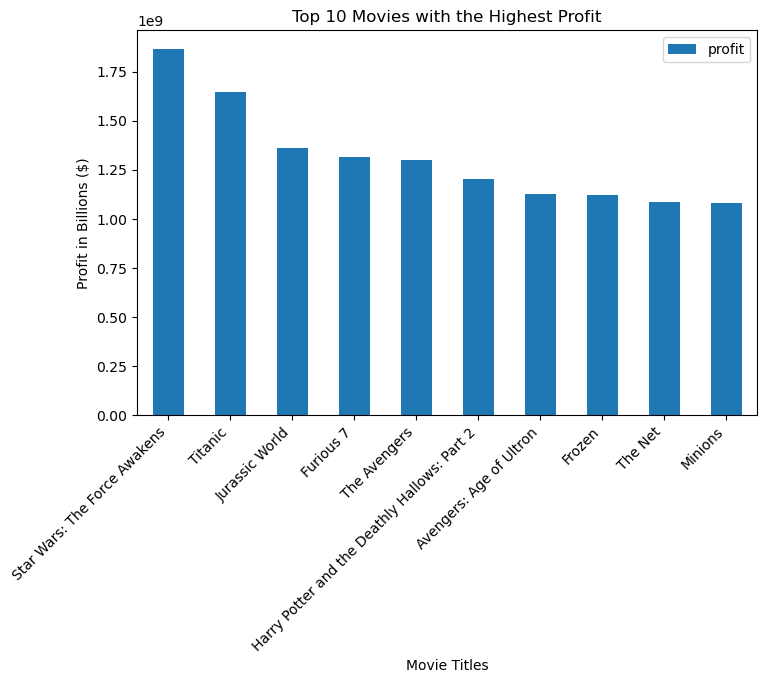

In [32]:
# Create a bar graph for the top 10 most profitable movies 
# First sort the raw data by the profit.
top_10_profitable_movies = movies2.nlargest(10, 'profit')
# Create title and profit lists which will be used as X-axis and Y-axis values in bar graph.
ax = top_10_profitable_movies.plot(kind='bar', x='Title', y='profit', figsize=(8, 5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Top 10 Movies with the Highest Profit')
plt.xlabel('Movie Titles')
plt.ylabel('Profit in Billions ($)')
plt.show()


<h4>we can see Star Wars: The Force Awakens is the best profit movies

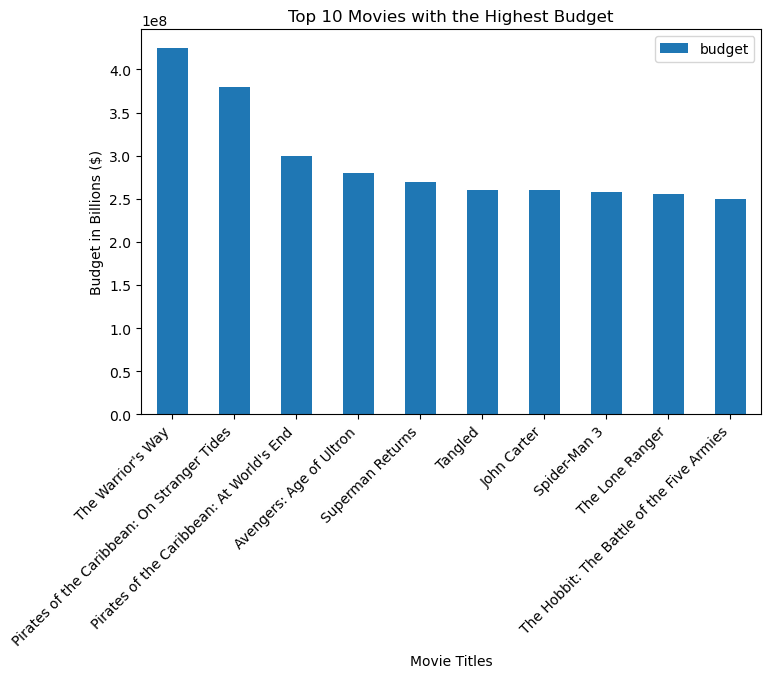

In [35]:
# Create a bar graph for the top 10 least budget movies 
# First sort the raw data by the budget.
top_10_profitable_movies = movies2.nlargest(10, 'budget')
# Create title and budget lists which will be used as X-axis and Y-axis values in bar graph.
ax = top_10_profitable_movies.plot(kind='bar', x='Title', y='budget', figsize=(8, 5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Top 10 Movies with the Highest Budget')
plt.xlabel('Movie Titles')
plt.ylabel('Budget in Billions ($)')
plt.show()

<h4>We can see The Warrior's Way is the movies spending most budget

# Q3: How does popularity affect the profit?

Correlation Coefficient: 0.591965781082233


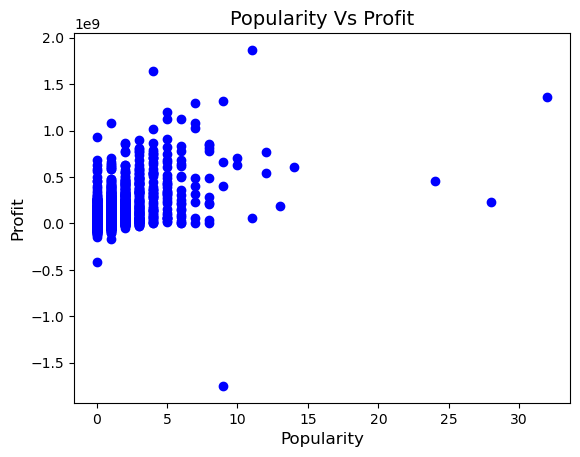

<Figure size 500x300 with 0 Axes>

In [39]:
# Create a scatter plot to study the relationship between popularity and profit
plt.scatter(movies2['popularity'], movies2['profit'], color='blue')

# Setup the title and labels of the scatter plot
plt.title("Popularity Vs Profit", fontsize=14)
plt.xlabel("Popularity", fontsize=12)
plt.ylabel("Profit", fontsize=12)

# Set the figure size
plt.figure(figsize=(5, 3))


# Calculate the correlation coefficient
correlation_coefficient = movies2['popularity'].corr(movies2['profit'])

# Print the correlation coefficient
print("Correlation Coefficient:", correlation_coefficient)

# Show the scatter plot
plt.show()

<h4>From the chart above, we can noticed that there is a positive relationship between popularity and profit. The lower correlation coefficient value is less desirable and is probabily because of movies with high budget and low profit and vv.

# Q4. What are the top casts, directors?

In [45]:
#Create new funtion to separate each person in each movie.
def get_data(column_name):
    # Split the column values by '|' and stack them into a single Series
    all_data = movies[column_name].str.split('|', expand=True).stack()
    
    # Count the occurrences of each value in descending order
    count = all_data.value_counts(ascending=False)
    
    return count

In [46]:
movies2.loc[:,['Title', 'cast', 'director']].head()

,Title,cast,director
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan


In [47]:
movies2.head()

,popularity,budget,revenue,Title,cast,director,runtime,genres,release_date,release_year,profit
0,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
1,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,228436354
2,13,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,185238201
3,11,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225
4,9,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2015,1316249360


In [57]:
#find top popularity cast
cast_count = get_data('cast')

top_rated_cast = cast_count.head(10)
print(top_rated_cast)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
John Goodman         49
Morgan Freeman       49
Liam Neeson          48
dtype: int64


In [58]:
#find top popularity cast
director_count = get_data('director')

top_rated_director = director_count.head(10)
print(top_rated_director)

Woody Allen          46
Clint Eastwood       34
Martin Scorsese      31
Steven Spielberg     30
Ridley Scott         23
Steven Soderbergh    23
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           20
dtype: int64


# Q5. Top high profit months

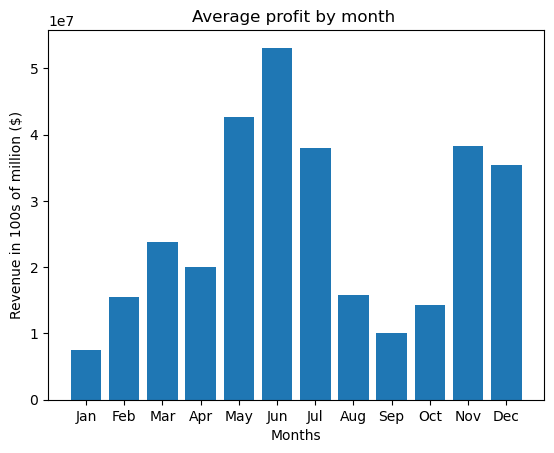

In [61]:
# Extract the month of release for every movie in a new column
movies2['release_month'] = pd.to_datetime(movies2['release_date']).dt.month

# Calculate the mean profit by month
profit_by_month = movies2.groupby('release_month')['profit'].mean()

# Define the months list
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Generate the bar plot
plt.bar(months, profit_by_month)
plt.title('Average profit by month ')
plt.xlabel('Months')
plt.ylabel('Revenue in 100s of million ($)')
plt.show()

<h4>The bar chart proves that movie are watched more in summer and winter times. It makes sense because mostly people have school vacations and holidays during these time

# Conclusion

The TMDb movie dataset provides a wealth of information on all movies. After performing data wrangling, we removed null values, duplicated values, and 0 values to ensure more accurate results. Additionally, we corrected wrong data types and created new columns, such as profit and monthly profit_average, for further investigation.

To visualize and answer questions, we utilized line plots and bar charts. The results highlighted the top profits, budgets, casts, directors, and more. We also examined the average profits made by each month, providing valuable insights into which movie characteristics attract a larger audience and how movie sales vary throughout the year.

Here are some key findings:

Profits: We observed a positive relationship between profits and budget as well as popularity. This suggests that higher-budget and more popular movies tend to generate greater profits.

Profit by Months: May and June, during the summer season, exhibited the highest mean movie profits. Following closely, November and December were the next two months with high mean movie profits. These findings indicate that specific months may be more favorable for movie releases in terms of generating profits.

Top 1 Cast: Robert De Niro emerged as the top cast member, indicating his popularity and influence in the movie industry.

Top 1 Director: Steven Spielberg stood out as the top director, underscoring his exceptional talent and successful track record.

The visualizations and analysis provided valuable insights into the movie dataset, shedding light on the factors influencing profitability and identifying key individuals who have made significant contributions to the film industry.

# Limitation

Predicting movie properties using TMDb dataset presents challenges due to removed data and inconsistent voting patterns.

To overcome these challenges, it is essential to address missing values and establish consistent data collection practices.

By addressing these issues, we can enhance the usefulness and accuracy of the dataset for analyzing movie data.

# Source

Pandas documents

Kaggle

github project